<a href="https://colab.research.google.com/github/elizabethts/DS5-kaggle-scalar-coupling/blob/master/notebooks/nov05_profile_2019_07_27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# created by nov05 on 2019-07-27
# DS5-kaggle-scalar-coupling/

Kaggle Data  Downloaded to Google Drive  
https://drive.google.com/open?id=1ZDcOZRZgcLCdcGlRbryEPyI81h9rj-JX  
GitHub Repo  
https://github.com/elizabethts/DS5-kaggle-scalar-coupling  
Notes on GitHub  
https://github.com/Nov05/DS5-kaggle-scalar-coupling/blob/master/readme/notes.md  

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
from google.colab import files
import zipfile
import glob
import os
import gc

competition_name = "champs-scalar-coupling"
path_data = "/content/drive/My Drive/data/"
path_molecular = path_data + "kaggle-molecular/"
path_structures = path_molecular + "structures/"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# list all files
%cd /content/drive/My Drive/data/kaggle-molecular/
!ls

/content/drive/My Drive/data/kaggle-molecular
dipole_moments.csv		scalar_coupling_contributions.csv
dipole_moments.gsheet		structures
magnetic_shielding_tensors.csv	structures.csv
mulliken_charges.csv		test.csv
potential_energy.csv		train.csv
sample_submission.csv


## Data Description

https://www.kaggle.com/c/champs-scalar-coupling/data   

In this competition, you will be predicting the scalar_coupling_constant between atom pairs in molecules, given the two atom types (e.g., C and H), the coupling type (e.g., 2JHC), and any features you are able to create from the molecule structure (xyz) files.

For this competition, **you will not be predicting all the atom pairs in each molecule** rather, you will only need to predict the pairs that are explicitly listed in the train and test files. For example, some molecules contain Fluorine (F), but you will not be predicting the scalar coupling constant for any pair that includes F.

The training and test splits are by molecule, so that no molecule in the training data is found in the test data.

## Files

**train.csv** - the training set, where the first column (molecule_name) is the name of the molecule where the coupling constant originates (the corresponding XYZ file is located at ./structures/.xyz), the second (atom_index_0) and third column (atom_index_1) is the atom indices of the atom-pair creating the coupling and the fourth column (scalar_coupling_constant) is the scalar coupling constant that we want to be able to predict

**test.csv** - the test set; same info as train, without the target variable

**sample_submission.csv** - a sample submission file in the correct format

**structures.zip** - folder containing molecular structure (xyz) files, where the first line is the number of atoms in the molecule, followed by a blank line, and then a line for every atom, where the first column contains the atomic element (H for hydrogen, C for carbon etc.) and the remaining columns contain the X, Y and Z cartesian coordinates (a standard format for chemists and molecular visualization programs)

**structures.csv** - this file contains the same information as the individual xyz structure files, but in a single file

## Additional Data

NOTE: additional data is provided for the molecules in Train only!

**dipole_moments.csv** - contains the molecular electric dipole moments. These are three dimensional vectors that indicate the charge distribution in the molecule. The first column (molecule_name) are the names of the molecule, the second to fourth column are the X, Y and Z components respectively of the dipole moment.

**magnetic_shielding_tensors.csv** - contains the magnetic shielding tensors for all atoms in the molecules. The first column (molecule_name) contains the molecule name, the second column (atom_index) contains the index of the atom in the molecule, the third to eleventh columns contain the XX, YX, ZX, XY, YY, ZY, XZ, YZ and ZZ elements of the tensor/matrix respectively.

**mulliken_charges.csv** - contains the mulliken charges for all atoms in the molecules. The first column (molecule_name) contains the name of the molecule, the second column (atom_index) contains the index of the atom in the molecule, the third column (mulliken_charge) contains the mulliken charge of the atom.

**potential_energy.csv** - contains the potential energy of the molecules. The first column (molecule_name) contains the name of the molecule, the second column (potential_energy) contains the potential energy of the molecule.

**scalar_coupling_contributions.csv** - The scalar coupling constants in train.csv (or corresponding files) are a sum of four terms. scalar_coupling_contributions.csv contain all these terms. The first column (molecule_name) are the name of the molecule, the second (atom_index_0) and third column (atom_index_1) are the atom indices of the atom-pair, the fourth column indicates the type of coupling, the fifth column (fc) is the Fermi Contact contribution, the sixth column (sd) is the Spin-dipolar contribution, the seventh column (pso) is the Paramagnetic spin-orbit contribution and the eighth column (dso) is the Diamagnetic spin-orbit contribution.   


https://medium.com/@Keshav31/colab-features-download-and-upload-e1ec537a83df  
https://colab.research.google.com/notebooks/io.ipynb  

You can manually trigger the garbage collection. But frequent calls to garbage collection is discouraged as it is a costly operation and may affect performance.  
https://stackoverflow.com/questions/32247643/how-to-delete-multiple-pandas-python-dataframes-from-memory-to-save-ram  



## Check file sizes

In [0]:
# check file sizes
def filesize(nbytes):
  for x in ['bytes', 'KB', 'MB', 'GB', 'TB', 'PB']:
    if nbytes < 1024.:
      return "%3.1f %s" % (nbytes, x)
    nbytes /= 1024.

st_size_total = 0.
fnames = []
for f in glob.glob(path_molecular+'*.csv'):
  st_size_total += os.stat(f).st_size
  fname = f.replace(path_molecular, "")
  fname = fname.replace('.csv', '')
  fnames.append(fname)
  fsize = filesize(os.stat(f).st_size)
  print(fname, '\t', fsize)
print("Total size:", filesize(st_size_total))

train 	 191.9 MB
test 	 83.8 MB
structures 	 135.2 MB
scalar_coupling_contributions 	 279.6 MB
sample_submission 	 23.9 MB
potential_energy 	 2.2 MB
mulliken_charges 	 42.0 MB
magnetic_shielding_tensors 	 130.0 MB
dipole_moments 	 3.1 MB
Total size: 891.6 MB


## train.csv

In [0]:
f = fnames[0]
df = pd.read_csv(path_molecular+f+'.csv')

In [0]:
print(f, df.shape)
df.head()

train (4658147, 6)


,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074


In [0]:
df.describe()

,id,atom_index_0,atom_index_1,scalar_coupling_constant
count,4.658147e+06,4.658147e+06,4.658147e+06,4.658147e+06
mean,2.329073e+06,1.335689e+01,5.883966e+00,1.592165e+01
std,1.344691e+06,3.267712e+00,4.993943e+00,3.494198e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,-3.621860e+01
25%,1.164536e+06,1.100000e+01,2.000000e+00,-2.549780e-01
50%,2.329073e+06,1.300000e+01,5.000000e+00,2.281130e+00
75%,3.493610e+06,1.600000e+01,8.000000e+00,7.390655e+00
max,4.658146e+06,2.800000e+01,2.800000e+01,2.048800e+02


In [0]:
df.select_dtypes(exclude=np.number).describe()

,molecule_name,type
count,4658147,4658147
unique,85003,8
top,dsgdb9nsd_042139,3JHC
freq,135,1510379


In [0]:
def df_value_counts(df):
  values, lens, colnames = [], [], []
  idx = [i for i in range(5)]
  for col in df.columns:
    v = df[col].value_counts().reset_index()
    lens.append(col+':'+str(len(v)))
    h = v.head()
    h.index = idx
    t = v.tail()
    t.index = idx
    values.append(h)
    values.append(t)
    colnames.append(col)
    colnames.append('head')
    colnames.append(col)
    colnames.append('tail')
  values = pd.concat(values, axis=1, sort=False)
  values.columns = colnames
  print("different values:", lens)
  return values
values = df_value_counts(df)
values

different values: ['id:4658147', 'molecule_name:85003', 'atom_index_0:29', 'atom_index_1:29', 'type:8', 'scalar_coupling_constant:2182935']


,id,head,id,tail,molecule_name,head,molecule_name,tail,atom_index_0,head,atom_index_0,tail,atom_index_1,head,atom_index_1,tail,type,head,type,tail,scalar_coupling_constant,head,scalar_coupling_constant,tail
0,4196351,1,3402967,1,dsgdb9nsd_042139,135,dsgdb9nsd_021441,2,12,552263,4,635,2,537311,24,3520,3JHC,1510379,3JHH,590611,-11.6520,31,-3.092770,1
1,4255048,1,3407061,1,dsgdb9nsd_123246,133,dsgdb9nsd_000828,2,13,505229,1,225,1,517218,26,629,2JHC,1140674,2JHH,378036,-11.3724,29,27.655500,1
2,4242754,1,3394771,1,dsgdb9nsd_096580,133,dsgdb9nsd_021849,2,9,485891,27,116,3,458480,25,596,1JHC,709416,3JHN,166415,-11.5202,28,-17.196400,1
3,46403,1,3398865,1,dsgdb9nsd_123139,132,dsgdb9nsd_133421,2,14,476556,28,92,4,439876,28,76,3JHH,590611,2JHN,119253,-11.6697,28,-4.446720,1
4,4230468,1,0,1,dsgdb9nsd_122665,132,dsgdb9nsd_000003,1,10,473624,0,3,5,415448,27,52,2JHH,378036,1JHN,43363,-11.4635,28,0.389893,1


## test.csv

In [0]:
f = fnames[1]
df = pd.read_csv(path_molecular+f+'.csv')
print(f, df.shape)
df.head()

test (2505542, 5)


,id,molecule_name,atom_index_0,atom_index_1,type
0,4658147,dsgdb9nsd_000004,2,0,2JHC
1,4658148,dsgdb9nsd_000004,2,1,1JHC
2,4658149,dsgdb9nsd_000004,2,3,3JHH
3,4658150,dsgdb9nsd_000004,3,0,1JHC
4,4658151,dsgdb9nsd_000004,3,1,2JHC


In [0]:
df.describe()

,id,atom_index_0,atom_index_1
count,2.505542e+06,2.505542e+06,2.505542e+06
mean,5.910918e+06,1.335449e+01,5.877949e+00
std,7.232878e+05,3.272209e+00,4.992313e+00
min,4.658147e+06,1.000000e+00,0.000000e+00
25%,5.284532e+06,1.100000e+01,2.000000e+00
50%,5.910918e+06,1.300000e+01,5.000000e+00
75%,6.537303e+06,1.600000e+01,8.000000e+00
max,7.163688e+06,2.800000e+01,2.800000e+01


In [0]:
df.select_dtypes(exclude=np.number).describe()

,molecule_name,type
count,2505542,2505542
unique,45772,8
top,dsgdb9nsd_041946,3JHC
freq,131,811999


In [0]:
values = df_value_counts(df)
values

different values: ['id:2505542', 'molecule_name:45772', 'atom_index_0:28', 'atom_index_1:29', 'type:8']


,id,head,id,tail,molecule_name,head,molecule_name,tail,atom_index_0,head,atom_index_0,tail,atom_index_1,head,atom_index_1,tail,type,head,type,tail
0,4658973,1,5881442,1,dsgdb9nsd_041946,131,dsgdb9nsd_000491,3,12,297573,4,303,2,290178,24,1863,3JHC,811999,3JHH,317435
1,5619731,1,5875297,1,dsgdb9nsd_060268,131,dsgdb9nsd_131419,2,13,271245,2,286,1,279232,26,387,2JHC,613138,2JHH,203126
2,5605402,1,5877344,1,dsgdb9nsd_060445,131,dsgdb9nsd_131074,2,9,261752,1,137,3,246208,25,372,1JHC,380609,3JHN,90616
3,5607449,1,5789279,1,dsgdb9nsd_096326,131,dsgdb9nsd_027034,2,14,255595,27,54,4,236209,28,34,3JHH,317435,2JHN,64424
4,5609496,1,4659427,1,dsgdb9nsd_116157,130,dsgdb9nsd_132243,2,10,255083,28,43,5,223022,27,23,2JHH,203126,1JHN,24195


## structures.csv  

for both train and test molecules

In [0]:
f = fnames[2]
df = pd.read_csv(path_molecular+f+'.csv')
print(f, df.shape)
df.head()

structures (2358657, 6)


,molecule_name,atom_index,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397


In [0]:
df.describe()

,atom_index,x,y,z
count,2.358657e+06,2.358657e+06,2.358657e+06,2.358657e+06
mean,8.757349e+00,9.489178e-02,-3.337381e-01,6.241504e-02
std,5.592487e+00,1.655271e+00,1.989152e+00,1.445870e+00
min,0.000000e+00,-9.234889e+00,-9.933938e+00,-9.134765e+00
25%,4.000000e+00,-8.746097e-01,-1.826156e+00,-8.424896e-01
50%,9.000000e+00,5.183615e-02,-4.035932e-01,1.093207e-02
75%,1.300000e+01,1.116101e+00,1.373660e+00,9.394357e-01
max,2.800000e+01,9.382240e+00,1.018196e+01,7.894733e+00


In [0]:
df.select_dtypes(exclude=np.number).describe()

,molecule_name,atom
count,2358657,2358657
unique,130775,5
top,dsgdb9nsd_058183,H
freq,29,1208387


In [0]:
values = df_value_counts(df)
values

different values: ['molecule_name:130775', 'atom_index:29', 'atom:5', 'x:2358441', 'y:2358364', 'z:2358421']


,molecule_name,head,molecule_name,tail,atom_index,head,atom_index,tail,atom,head,atom,tail,x,head,x,tail,y,head,y,tail,z,head,z,tail
0,dsgdb9nsd_058183,29,dsgdb9nsd_000001,5,0,130775,24,2373,H,1208387,H,1208387,1.718218,2,-1.971617,1,0.000000,25,3.556175,1,1.000000,9,0.079165,1
1,dsgdb9nsd_101611,29,dsgdb9nsd_000002,4,1,130775,25,450,C,831726,C,831726,1.340796,2,-1.710241,1,2.011211,2,-0.265920,1,0.000000,6,1.989778,1
2,dsgdb9nsd_099964,29,dsgdb9nsd_000004,4,2,130775,26,391,O,183187,O,183187,1.541167,2,0.646930,1,-1.001659,2,1.419407,1,-1.261138,2,0.609443,1
3,dsgdb9nsd_122877,29,dsgdb9nsd_000003,3,3,130773,27,35,N,132361,N,132361,1.359100,2,2.457004,1,3.382052,2,-0.291140,1,1.998706,2,0.003090,1
4,dsgdb9nsd_101816,29,dsgdb9nsd_000005,3,4,130771,28,35,F,2996,F,2996,-2.147225,2,-0.169536,1,2.216082,2,-2.329218,1,-1.240759,2,-1.644857,1


## scalar_coupling_contributions.csv   

This is only for train molecule data (85003 molecules).

In [0]:
f = fnames[3]
df = pd.read_csv(path_molecular+f+'.csv')
print(f, df.shape)
df.head()

scalar_coupling_contributions (4658147, 8)


,molecule_name,atom_index_0,atom_index_1,type,fc,sd,pso,dso
0,dsgdb9nsd_000001,1,0,1JHC,83.0224,0.254579,1.25862,0.272010
1,dsgdb9nsd_000001,1,2,2JHH,-11.0347,0.352978,2.85839,-3.433600
2,dsgdb9nsd_000001,1,3,2JHH,-11.0325,0.352944,2.85852,-3.433870
3,dsgdb9nsd_000001,1,4,2JHH,-11.0319,0.352934,2.85855,-3.433930
4,dsgdb9nsd_000001,2,0,1JHC,83.0222,0.254585,1.25861,0.272013


In [0]:
df.describe()

,atom_index_0,atom_index_1,fc,sd,pso,dso
count,4.658147e+06,4.658147e+06,4.658147e+06,4.658147e+06,4.658147e+06,4.658147e+06
mean,1.335689e+01,5.883966e+00,1.569776e+01,8.233637e-02,3.751619e-01,-2.336117e-01
std,3.267712e+00,4.993943e+00,3.441461e+01,1.386516e-01,7.422133e-01,9.296036e-01
min,0.000000e+00,0.000000e+00,-3.722400e+01,-3.184910e+00,-3.288110e+00,-6.856790e+00
25%,1.100000e+01,2.000000e+00,-2.129645e-01,-1.438100e-02,-3.506500e-02,-3.734250e-01
50%,1.300000e+01,5.000000e+00,2.327140e+00,5.072900e-02,1.594810e-01,-6.476600e-02
75%,1.600000e+01,8.000000e+00,7.472885e+00,1.303520e-01,4.350445e-01,1.433210e-01
max,2.800000e+01,2.800000e+01,2.055170e+02,2.296690e+00,8.201530e+00,1.701610e+00


In [0]:
values = df_value_counts(df)
values

different values: ['molecule_name:85003', 'atom_index_0:29', 'atom_index_1:29', 'type:8', 'fc:2171072', 'sd:576942', 'pso:1355945', 'dso:1443215']


,molecule_name,head,molecule_name,tail,atom_index_0,head,atom_index_0,tail,atom_index_1,head,atom_index_1,tail,type,head,type,tail,fc,head,fc,tail,sd,head,sd,tail,pso,head,pso,tail,dso,head,dso,tail
0,dsgdb9nsd_042139,135,dsgdb9nsd_021441,2,12,552263,4,635,2,537311,24,3520,3JHC,1510379,3JHH,590611,-11.6819,32,-3.977640,1,-0.032579,49,0.498849,1,1.801740,22,-0.282650,1,1.01248,29,-0.523847,1
1,dsgdb9nsd_123246,133,dsgdb9nsd_000828,2,13,505229,1,225,1,517218,26,629,2JHC,1140674,2JHH,378036,-11.5730,30,9.312150,1,-0.032230,49,0.902666,1,0.225626,22,1.151700,1,1.00908,29,-1.234130,1
2,dsgdb9nsd_096580,133,dsgdb9nsd_021849,2,9,485891,27,116,3,458480,25,596,1JHC,709416,3JHN,166415,-11.5540,30,-0.279036,1,-0.031363,47,-0.126418,1,-0.042280,21,0.487733,1,1.02141,29,0.789978,1
3,dsgdb9nsd_123139,132,dsgdb9nsd_133421,2,14,476556,28,92,4,439876,28,76,3JHH,590611,2JHN,119253,-11.6426,30,0.544804,1,-0.032530,46,0.346525,1,-0.071992,21,0.496642,1,1.03324,28,0.380959,1
4,dsgdb9nsd_122665,132,dsgdb9nsd_000003,1,10,473624,0,3,5,415448,27,52,2JHH,378036,1JHN,43363,-11.6345,29,0.000000,1,-0.030894,46,0.431647,1,2.009990,21,-0.394681,1,1.02708,28,0.764658,1


## potential_energy.csv

for train data only (85003 molecules)

In [0]:
f = fnames[5]
df = pd.read_csv(path_molecular+f+'.csv')
print(f, df.shape)
df.head()

potential_energy (85003, 2)


,molecule_name,potential_energy
0,dsgdb9nsd_000001,-40.52368
1,dsgdb9nsd_000002,-56.56025
2,dsgdb9nsd_000003,-76.42608
3,dsgdb9nsd_000005,-93.42849
4,dsgdb9nsd_000007,-79.83869


In [0]:
df.describe()

,potential_energy
count,85003.000000
mean,-410.874055
std,39.828871
min,-714.626200
25%,-438.000750
50%,-416.921700
75%,-387.218950
max,-40.523680


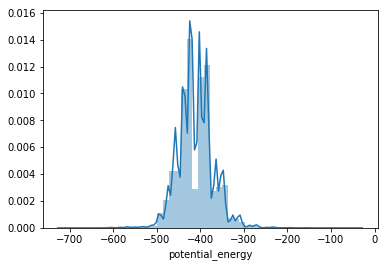

In [0]:
sns.distplot(df['potential_energy']);

## mulliken_charges.csv

for train data only (85003 molecules)

In [0]:
f = fnames[6]
df = pd.read_csv(path_molecular+f+'.csv')
print(f, df.shape)
df.head()

mulliken_charges (1533537, 3)


,molecule_name,atom_index,mulliken_charge
0,dsgdb9nsd_000001,0,-0.535689
1,dsgdb9nsd_000001,1,0.133921
2,dsgdb9nsd_000001,2,0.133922
3,dsgdb9nsd_000001,3,0.133923
4,dsgdb9nsd_000001,4,0.133923


In [0]:
df.describe()

,atom_index,mulliken_charge
count,1.533537e+06,1.533537e+06
mean,8.759199e+00,-2.256222e-10
std,5.592808e+00,2.254392e-01
min,0.000000e+00,-7.334500e-01
25%,4.000000e+00,-1.915330e-01
50%,9.000000e+00,9.867800e-02
75%,1.300000e+01,1.273960e-01
max,2.800000e+01,7.289810e-01


In [94]:
df.select_dtypes(exclude=np.number).describe()

,molecule_name
count,1533537
unique,85003
top,dsgdb9nsd_117978
freq,29


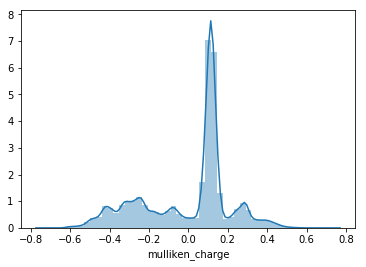

In [0]:
sns.distplot(df['mulliken_charge']);

## magnetic_shielding_tensors.csv

for train data only (85003 molucules)

In [0]:
f = fnames[7]
df = pd.read_csv(path_molecular+f+'.csv')
print(f, df.shape)
df.head()

magnetic_shielding_tensors (1533537, 11)


,molecule_name,atom_index,XX,YX,ZX,XY,YY,ZY,XZ,YZ,ZZ
0,dsgdb9nsd_000001,0,195.3150,0.0000,-0.0001,0.0000,195.3170,0.0007,-0.0001,0.0007,195.3170
1,dsgdb9nsd_000001,1,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861
2,dsgdb9nsd_000001,2,31.5814,1.2173,-4.1474,1.2173,28.9036,-1.6036,-4.1476,-1.6036,33.8967
3,dsgdb9nsd_000001,3,31.5172,4.1086,1.2723,4.1088,33.9068,1.6950,1.2724,1.6951,28.9579
4,dsgdb9nsd_000001,4,31.4029,-4.0942,-1.1793,-4.0944,34.0776,1.6259,-1.1795,1.6260,28.9013


In [80]:
df.describe()

,atom_index,XX,YX,ZX,XY,YY,ZY,XZ,YZ,ZZ
count,1.533537e+06,1.533537e+06,1.533537e+06,1.533537e+06,1.533537e+06,1.533537e+06,1.533537e+06,1.533537e+06,1.533537e+06,1.533537e+06
mean,8.759199e+00,6.881581e+01,-9.326109e-02,9.941325e-02,-1.320880e-01,6.549244e+01,-3.228053e-02,1.055878e-01,2.729817e-02,8.261999e+01
std,5.592808e+00,1.147867e+02,3.691271e+01,3.413662e+01,3.679941e+01,1.063009e+02,3.370626e+01,3.484276e+01,3.416867e+01,8.556882e+01
min,0.000000e+00,-3.452650e+03,-7.582950e+02,-7.319900e+02,-9.447450e+02,-2.146680e+03,-6.457610e+02,-7.043470e+02,-6.542020e+02,-9.486030e+02
25%,4.000000e+00,2.804470e+01,-3.334200e+00,-2.541200e+00,-3.202000e+00,2.719330e+01,-2.795100e+00,-2.484500e+00,-2.801100e+00,2.735380e+01
50%,9.000000e+00,3.190900e+01,1.000000e-03,0.000000e+00,9.000000e-04,3.174760e+01,-0.000000e+00,0.000000e+00,0.000000e+00,3.378320e+01
75%,1.300000e+01,1.480430e+02,3.373300e+00,2.617500e+00,3.236000e+00,1.361710e+02,2.845100e+00,2.552700e+00,2.872000e+00,1.416480e+02
max,2.800000e+01,4.254020e+02,1.080230e+03,6.620490e+02,1.273990e+03,4.254660e+02,6.739150e+02,8.633610e+02,7.384150e+02,5.568840e+02


In [82]:
df['molecule_name'].describe()

count              1533537
unique               85003
top       dsgdb9nsd_117978
freq                    29
Name: molecule_name, dtype: object

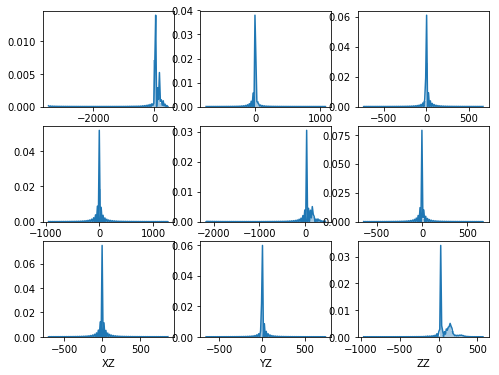

In [93]:
plt.figure(figsize=(8,6))
for i,col in enumerate(df.columns[2:]):
  plt.subplot(3,3,i+1)
  sns.distplot(df[col])

## dipole_moments.csv

for train data only (80053 molecules)

In [95]:
f = fnames[8]
df = pd.read_csv(path_molecular+f+'.csv')
print(f, df.shape)
df.head()

dipole_moments (85003, 4)


,molecule_name,X,Y,Z
0,dsgdb9nsd_000001,0.0000,0.0,0.0000
1,dsgdb9nsd_000002,-0.0002,0.0,1.6256
2,dsgdb9nsd_000003,0.0000,0.0,-1.8511
3,dsgdb9nsd_000005,0.0000,0.0,-2.8937
4,dsgdb9nsd_000007,0.0000,0.0,0.0000


In [98]:
df.describe()

,X,Y,Z
count,85003.000000,85003.000000,85003.000000
mean,-0.019937,0.093764,0.252982
std,2.283738,1.739395,1.027573
min,-22.958000,-9.252300,-6.028500
25%,-1.363250,-0.941950,-0.247750
50%,-0.000100,0.081400,0.117600
75%,1.311000,1.166750,0.902050
max,21.873800,13.005600,6.880100


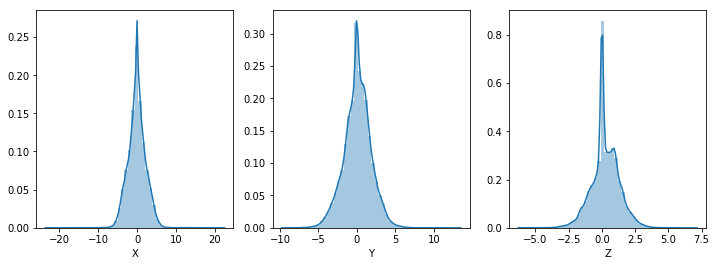

In [101]:
plt.figure(figsize=(12,4))
for i,col in enumerate(df.columns[1:]):
  plt.subplot(1,3,i+1)
  sns.distplot(df[col])

## sample_submission.csv

In [0]:
f = fnames[4]
df = pd.read_csv(path_molecular+f+'.csv')
print(f, df.shape)
df.head()

sample_submission (2505542, 2)


,id,scalar_coupling_constant
0,4658147,0
1,4658148,0
2,4658149,0
3,4658150,0
4,4658151,0
